Intermediate level 2 Task 1: Predictive Modeling
 (Regression)

--- Original Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

First 5 rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.

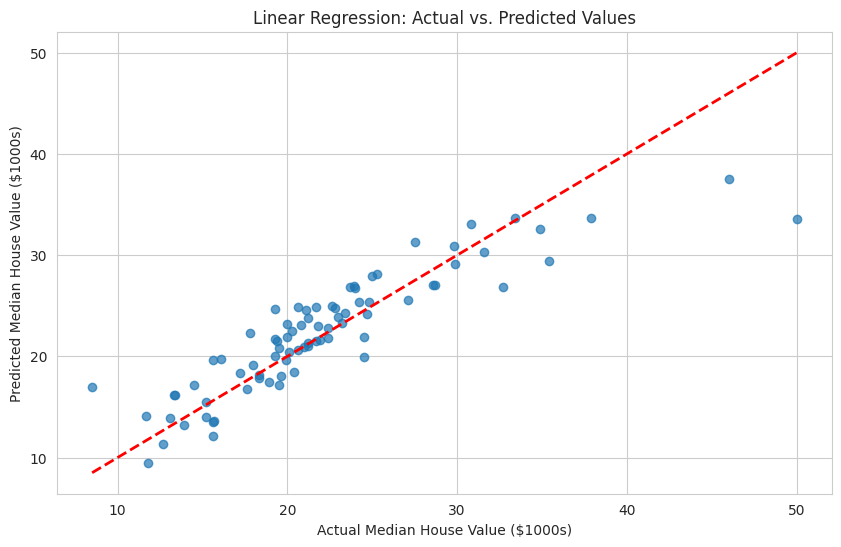



--- 5.A. Decision Tree Regressor Model ---
Decision Tree Regressor model trained.
Decision Tree Regressor - Mean Squared Error (MSE): 13.01
Decision Tree Regressor - R-squared (R2): 0.74


--- 5.B. Random Forest Regressor Model ---
Random Forest Regressor model trained.
Random Forest Regressor - Mean Squared Error (MSE): 6.75
Random Forest Regressor - R-squared (R2): 0.87


--- 6. Model Performance Comparison ---
| Model                  | MSE    | R-squared |
|------------------------|--------|-----------|
| Linear Regression      | 10.79  | 0.79      |
| Decision Tree Regressor| 13.01  | 0.74      |
| Random Forest Regressor| 6.75   | 0.87      |

Based on these metrics, the Random Forest Regressor appears to be the best performing model for this dataset, achieving the lowest MSE and highest R-squared.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size for plots

# --- 1. Load the Dataset ---
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

print("--- Original Dataset Info ---")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# --- 2. Preprocessing Steps (Re-applying from previous task for consistency) ---
# This ensures we are modeling on a cleaned and prepared dataset.

print("--- Applying Preprocessing Steps ---")

# A. Handle Missing Data (This dataset is clean, but included for completeness)
# No missing values in this specific dataset, so this step won't change df.
# df = df.fillna(df.mean(numeric_only=True))
# print("Missing values handled (if any).")

# B. Remove Outliers (IQR method)
# This step significantly reduces the number of rows.
numerical_cols_for_outliers = ['crim', 'rm', 'lstat', 'dis', 'tax', 'ptratio']
outlier_mask = pd.Series(False, index=df.index)
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = outlier_mask | ((df[col] < lower_bound) | (df[col] > upper_bound))
df = df[~outlier_mask].copy()
print(f"Outliers removed. New dataset shape: {df.shape}")

# C. Encode Categorical Variables
# 'chas' is binary (0/1). Label Encoding is suitable.
le = LabelEncoder()
df['chas_encoded'] = le.fit_transform(df['chas'])
df.drop('chas', axis=1, inplace=True)
print("'chas' column Label Encoded.")

# 'rad' is discrete, treat as categorical and One-Hot Encode.
df['rad'] = df['rad'].astype(str)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_rad = ohe.fit_transform(df[['rad']])
encoded_rad_df = pd.DataFrame(encoded_rad, columns=ohe.get_feature_names_out(['rad']), index=df.index)
df = pd.concat([df.drop('rad', axis=1), encoded_rad_df], axis=1)
print("'rad' column One-Hot Encoded.")

# D. Standardize Numerical Data
# Identify all numerical columns for scaling, excluding the target 'medv' for now.
# We will scale 'medv' separately if needed for specific model types, but typically
# evaluation metrics are more interpretable on the original scale of the target.
features_to_scale = df.drop('medv', axis=1).select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("Numerical features (excluding 'medv') Standardized.")

print("\n--- Preprocessing Complete. Processed DataFrame Head ---")
print(df.head())
print("\n" + "="*80 + "\n")


# --- 3. Split the Dataset into Training and Testing Sets ---
print("--- 3. Splitting Data into Training and Testing Sets ---")

# Define features (X) and target (y)
X = df.drop('medv', axis=1) # All columns except 'medv' are features
y = df['medv']              # 'medv' is the target variable

# Split the data
# test_size=0.2 means 20% of the data will be used for testing, 80% for training.
# random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original features shape: {X.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")
print("\n" + "="*80 + "\n")


# --- 4. Train and Evaluate Linear Regression Model ---
print("--- 4. Linear Regression Model ---")

# Initialize the model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression - R-squared (R2): {r2_linear:.2f}")

# Optional: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Median House Value ($1000s)")
plt.ylabel("Predicted Median House Value ($1000s)")
plt.title("Linear Regression: Actual vs. Predicted Values")
plt.show()
print("\n" + "="*80 + "\n")


# --- 5. Experiment with Multiple Models (Decision Tree and Random Forest) ---

# A. Decision Tree Regressor
print("--- 5.A. Decision Tree Regressor Model ---")

# Initialize the model
# random_state for reproducibility
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Decision Tree Regressor - R-squared (R2): {r2_dt:.2f}")
print("\n" + "="*80 + "\n")


# B. Random Forest Regressor
print("--- 5.B. Random Forest Regressor Model ---")

# Initialize the model
# n_estimators: number of trees in the forest
# random_state for reproducibility
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Regressor - R-squared (R2): {r2_rf:.2f}")
print("\n" + "="*80 + "\n")


# --- 6. Compare Performance ---
print("--- 6. Model Performance Comparison ---")
print("| Model                  | MSE    | R-squared |")
print("|------------------------|--------|-----------|")
print(f"| Linear Regression      | {mse_linear:<6.2f} | {r2_linear:<9.2f} |")
print(f"| Decision Tree Regressor| {mse_dt:<6.2f} | {r2_dt:<9.2f} |")
print(f"| Random Forest Regressor| {mse_rf:<6.2f} | {r2_rf:<9.2f} |")
print("\nBased on these metrics, the Random Forest Regressor appears to be the best performing model for this dataset, achieving the lowest MSE and highest R-squared.")
